GENETIC ALGORITHM FROM SCRATCH


> Sphere Function

> RosenBrock Function

> Rastrigin Function






In [78]:
# Importing Required Packages
from random import randint as rand
from random import *
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [79]:
# To make Duplicate of a population array by copying each chromosome in it
# I'm using this method to make a copy of each dictionary[chromosome] inside the list[population]
def duplicate(popl):
  temp = {}
  for i in popl:
    temp[i] = popl[i].copy()
  return temp

In [80]:
## BenchMark Functions / Fitness Functions

# Sphere Function
def sphere(x):
  return np.sum(np.square(x))

# Rosenbrock function
def Rosenbrockfunc(x):
  x=list(x)
  out = sum([100*pow(((x[i+1])-pow(x[i],2)),2)+pow((1-x[i]),2) for i in range(len(x)-1)])
  return out

# Rastrigin function
def Rastriginfunc(x):
  A=10
  return (A*len(x) + np.sum(np.square(x) - A * np.cos(2 * math.pi * x)))

In [81]:
## Generating n population (here n=npop)
def generate_population(xmin,xmax,dim,npop):
    population={}
    population = {'xval': None}
    population['xval'] = np.random.uniform(low=xmin,high=xmax,size=[npop,dim])
    return population

In [82]:
# In this Selection part we're finding the fitness using the benchmark functions chosen, and deciding the parent
def selection(popl,func_no):

  # initializing the fitness as null inorder to avoid confusion while implementing iteration
  popl['fitness'] = np.array([])

  # finding Fitness by calling the benchmark Functions
  if func_no == 1:
    popl['fitness'] = np.array([sphere(popl['xval'][i]) for i in range(len(popl['xval']))])
  elif func_no == 2:
    popl['fitness'] = np.array([Rosenbrockfunc(popl['xval'][i]) for i in range(len(popl['xval']))])
  elif func_no == 3:
    popl['fitness'] = np.array([Rastriginfunc(popl['xval'][i]) for i in range(len(popl['xval']))])

  # intializing parents
  parent1 = {}
  parent2 = {}
  
  # Using Tournanment selection
  # Basically we are selecting 3 choices from the fitness and then we're choosing the parents with the lowest value among them
  r1,r2,r3 = rand(0,len(popl['fitness'])-1),rand(0,len(popl['fitness'])-1),rand(0,len(popl['fitness'])-1)
  temp1 = random.choices(popl['fitness'].copy(),k=3)
  temp1 = np.sort(temp1)  # Sorting the shortlisted fitness values
  parent1_loc = list(popl['fitness']).index(temp1[0])
  parent2_loc = list(popl['fitness']).index(temp1[1])  
  parent1['xval'] = popl['xval'][parent1_loc].copy()  # Selecting the parent 1
  parent1['fitness'] = popl['fitness'][parent1_loc].copy()
  parent2['xval'] = popl['xval'][parent2_loc].copy() # Selecting the parent 2
  
  return parent1,parent2

In [83]:
def crossover(parent1,parent2):

  x_point = rand(0,len(parent1['xval'])-1)

  child1 = np.concatenate([parent1['xval'][:x_point].copy(),parent2['xval'][x_point:].copy()])
  child2 = np.concatenate([parent2['xval'][:x_point].copy(),parent1['xval'][x_point:].copy()])

  return child1,child2

In [110]:
def mutation(xmin,xmax,child1,child2,parent1,parent2):
    r = rand(0,len(child1)-1) # getting a random location to make the mutaion at child
    child1[r] = random.uniform(xmin,xmax)
    child2[r] = random.uniform(xmin,xmax)

    return child1,child2

In [90]:
# This is to visualize the output found
def plot(l):
  plt.semilogx(l)

In [111]:
def main():
  dim = 10  # dimention
  npop = 10 #No of population
  max_itr = 10000 # No of iterations 
  xmin=-100 # min input val
  xmax= 100 # max input val

  # Creating the initial population
  population = generate_population(xmin,xmax,dim,npop)  

  functions=['sphere','Rosenbrock', 'Rastrigin']  # The Benchmark functions we'll be using
  List_out=[] # The temporary list to store the fitness of selected parents for a single function
  Final_out=[]  # The final list containing the fitness of all benchmark functions

  # This loop is to go through all 3 benchmark functions
  # for j in range(1):
  for j in range(len(functions)):
    
    # initializing the population to new variable before the real process starts
    # so that the population will remain same for each benchmark Function
    population_c = generate_population(xmin,xmax,dim,npop)  

    #Start of the Genetic Algorithm
    for i in range(max_itr):

      # Selection of Parent 1 & Parent 2
      parent1,parent2 = selection(duplicate(population_c),j+1)

      # Adding the Fitness of the parrent 1 to the list
      if(len(List_out)==0):
        List_out.append(parent1['fitness'].copy())
        del parent1['fitness']
      elif(parent1['fitness']<=List_out[-1]):
        List_out.append(parent1['fitness'].copy())
        del parent1['fitness']


      # Checking if the parent1 fitness is 0
      if (round(List_out[-1])==0):
        break

      # destroying the previous generated population and creating empty array for newly mutated population
      population_c['xval'] = np.array([])

      # Creating the new population
      for n in range(int(npop/2)):
        # Crossover
        child1,child2 = crossover(parent1.copy(),parent2.copy())

        # Mutation
        child1,child2 = mutation(xmin,xmax,child1.copy(),child2.copy(),parent1['xval'].copy(),parent2['xval'].copy())

        # storing the mutated population for the next iteration
        if(len(population_c['xval'])==0):
          population_c['xval'] = np.array([child1.copy()])
          population_c['xval'] = np.append(population_c['xval'],np.array([child2.copy()]),axis=0)
        else:
          population_c['xval'] = np.append(population_c['xval'],np.array([child1.copy()]),axis=0)
          population_c['xval'] = np.append(population_c['xval'],np.array([child2.copy()]),axis=0)
    
    # Adding the list of fitness after each running through benchmark function
    Final_out.append(List_out)
    List_out=[]

    # Printing the Optimum Value got from each benchmark function
    print(str(functions[j])+" Optimum Value\t:\t",Final_out[j][-1])
    List_out=[]
  return Final_out
l = main()

sphere Optimum Value	:	 1712.0127000879418
Rosenbrock Optimum Value	:	 51282475.904615015
Rastrigin Optimum Value	:	 1487.5671614703047


Sphere Function
Optimum Value :  1712.0127000879418


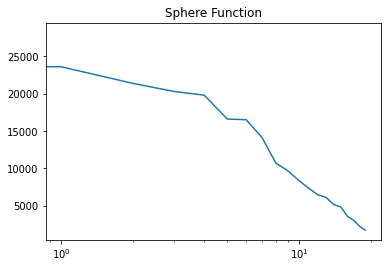

In [112]:
plt.title("Sphere Function")
plot(l[0])
print("Sphere Function\nOptimum Value : ",l[0][-1])

Rosenbrock function
Optimum Value :  51282475.904615015


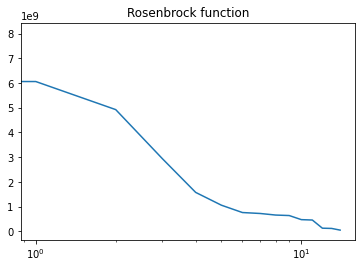

In [113]:
plt.title("Rosenbrock function")
plot(l[1])
print("Rosenbrock function\nOptimum Value : ",l[1][-1])

Rastrigin function
Optimum Value :  1487.5671614703047


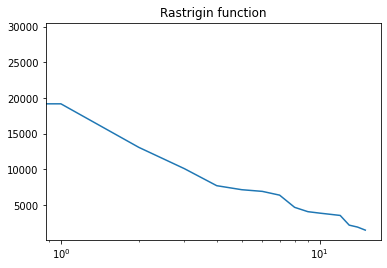

In [114]:
plt.title("Rastrigin function")
plot(l[2])
print("Rastrigin function\nOptimum Value : ",l[2][-1])